In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [65]:
pd.__version__

'1.1.3'

In [85]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [104]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df = df.drop(['description', 'title', 'Unnamed: 0'], axis=1)
df.head()

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks


In [105]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


<AxesSubplot:title={'center':'Top 5 wine produсers'}>

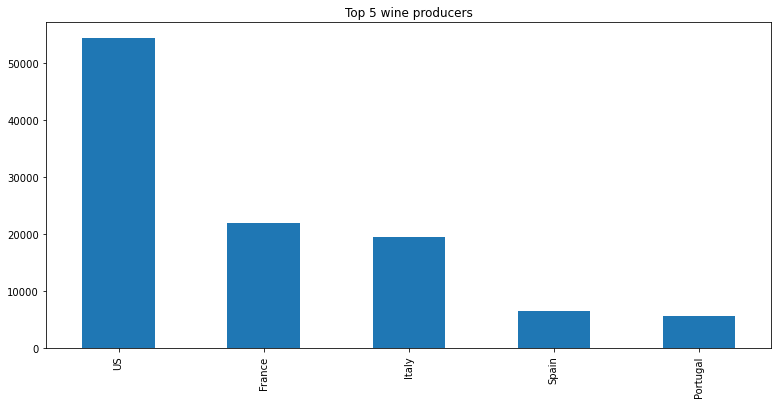

In [154]:
# вызовем топ-5 стран производителей вина 

top5_countries = df['country'].value_counts().head(5)
top5_countries.plot(kind = 'bar', title = 'Top 5 wine produсers')


In [118]:
# выведем топ-7 стран, где цены на вино выше средней (35.36)

price_above_average = df[['country', 'price']].groupby('country')['price'].agg(['mean']).sort_values(by='mean', ascending=False).head(10)
# price_above_average.head(7)

<AxesSubplot:title={'center':'Wine price above average'}, xlabel='Country', ylabel='Avg price'>

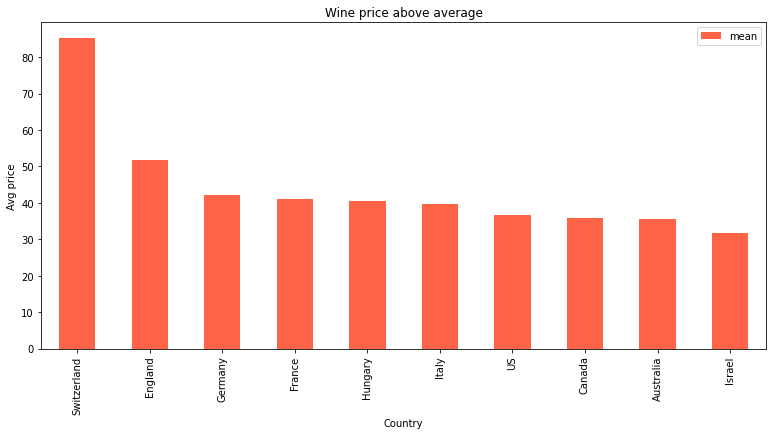

In [170]:
price_above_average.plot(kind = 'bar', 
                         title = 'Wine price above average', 
                         xlabel = 'Country',
                         color = 'tomato',
                         ylabel = 'Avg price')

<AxesSubplot:title={'center':'Correlation between expert points and price'}, xlabel='points', ylabel='price'>

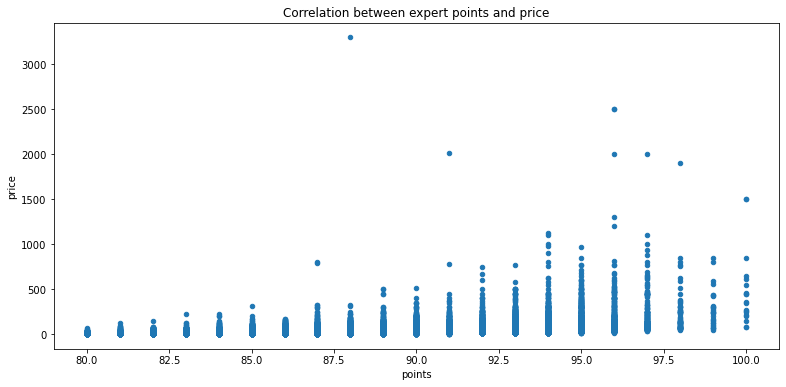

In [171]:
# посмотрим на взаимосвязь оценок и ценЫ. 
# Предварительно можно выдвинуть гипотезу о том, что оценка критиков повышается вместе со стоимостью вина 

df.plot(kind='scatter', 
        x='points', 
        y='price',
        title='Correlation between expert points and price')

<AxesSubplot:>

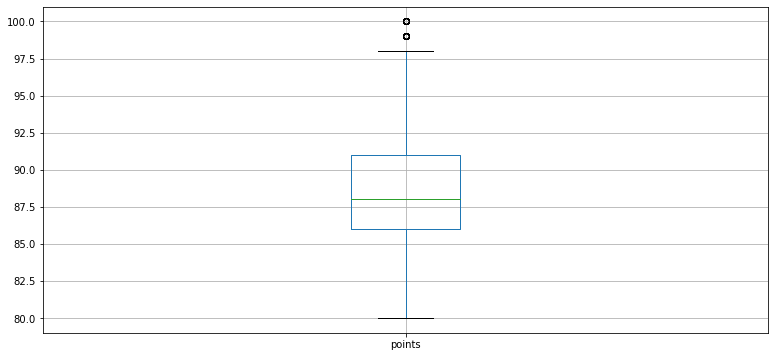

In [146]:
# отобразим распределение оценок и найдём выбросы 
# здесь мы можем увидеть, что сред.оценка экспертов 88, только несколько человек поставили более 98

df.boxplot(column='points')

Text(0, 0.5, 'frequancy')

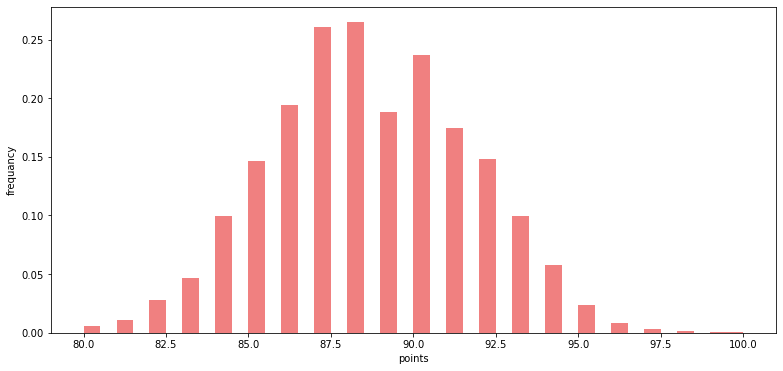

In [168]:
# видим, что характеристики ближе к среднему встречаются чаще, чем дальше от среднего. 
# больше всего критики ставили оценку ближе к средней 

plt.hist(x=df['points'], bins=40, density=True, color = 'lightcoral')
plt.xlabel('points')
plt.ylabel('frequancy')

# bins задает кол-во интервалов, на которые данные разбиваются 

<AxesSubplot:xlabel='points', ylabel='average price'>

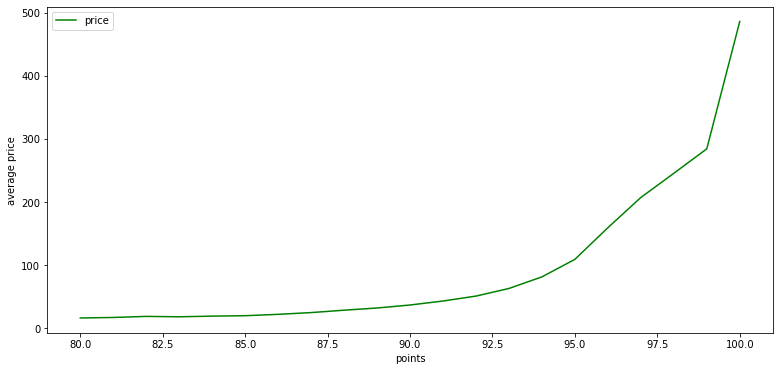

In [153]:
# из графика ниже можем увидеть, что оценка экспертов тем выше, чем выше цена на вино 

points_df = df.groupby('points').mean()
points_df.plot(xlabel = 'points',
               ylabel = 'average price',
               color = 'green')